### 1. Acquiring and Loading Data

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt 
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision = 4, suppress = True)

In [3]:
uscovid = pd.read_csv('datasets/us-counties.csv', header=0)

In [4]:
uscovid.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


For acquiring and loading data, We downloaded the New York Times github. Next, we loaded the csv into a dataframe, using pd.read_csv; uscovid for the us-counties csv.

### 2. Exploring and Visualizing Data

In [5]:
uscovid.shape

(233740, 6)

To analyze the data statistics and features, the dimensionality of the dataframe must be checked. To do that, I use the .shape in order to check the rows and columns of the dataframe. As you can see, the us-counties has 233740 rows and 6 columns.

In [6]:
uscovid.columns.values

array(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype=object)

In [7]:
uscovid.county.dtypes

dtype('O')

Next we will explore the column names for both dataframe. The column.values method allows us to get all the name of columns and see what kind of interesting data we can analyze.

### 3. Wrangling and Cleaning Data

In [8]:
uscovid.isnull().sum()

date         0
county       0
state        0
fips      2472
cases        0
deaths       0
dtype: int64

Cleaning and wrangling are important parts of any data analysis project. To do that, we will need to somehow find missing values on the dataframe. The isnull() method will check for rows with empty values and return boolean values. Add sim() to the line will show us the total of empty values for on each columns. There are some missing data in the dataframe, however, since the fips is specifically for county, we can't really fill in those missing data. We can't also remove them because we will need the fips to map out the data our visualizations. 

### 4. Analyzing Data and Visualizations

In [15]:
latestuscovid = uscovid[uscovid['date'].str.match('2020-06-13')] #latest data available

In [17]:
latestuscovid

,date,county,state,fips,cases,deaths
230714,2020-06-13,Autauga,Alabama,1001.0,335,6
230715,2020-06-13,Baldwin,Alabama,1003.0,376,9
230716,2020-06-13,Barbour,Alabama,1005.0,227,1
230717,2020-06-13,Bibb,Alabama,1007.0,103,1
230718,2020-06-13,Blount,Alabama,1009.0,104,1
...,...,...,...,...,...,...
233735,2020-06-13,Sweetwater,Wyoming,56037.0,40,0
233736,2020-06-13,Teton,Wyoming,56039.0,104,1
233737,2020-06-13,Uinta,Wyoming,56041.0,71,0
233738,2020-06-13,Washakie,Wyoming,56043.0,38,3


In [23]:
groupbystatelatest = latestuscovid.groupby(['state']).sum()

In [31]:
groupbystatelatest

,fips,cases,deaths
state,,,
Alabama,71489.0,24601,773
Alaska,51497.0,722,10
Arizona,60208.0,34773,1190
Arkansas,375612.0,12095,177
California,345315.0,150418,5059
...,...,...,...
Virginia,6613332.0,53869,1541
Washington,2015498.0,26920,1216
West Virginia,2864907.0,2274,88


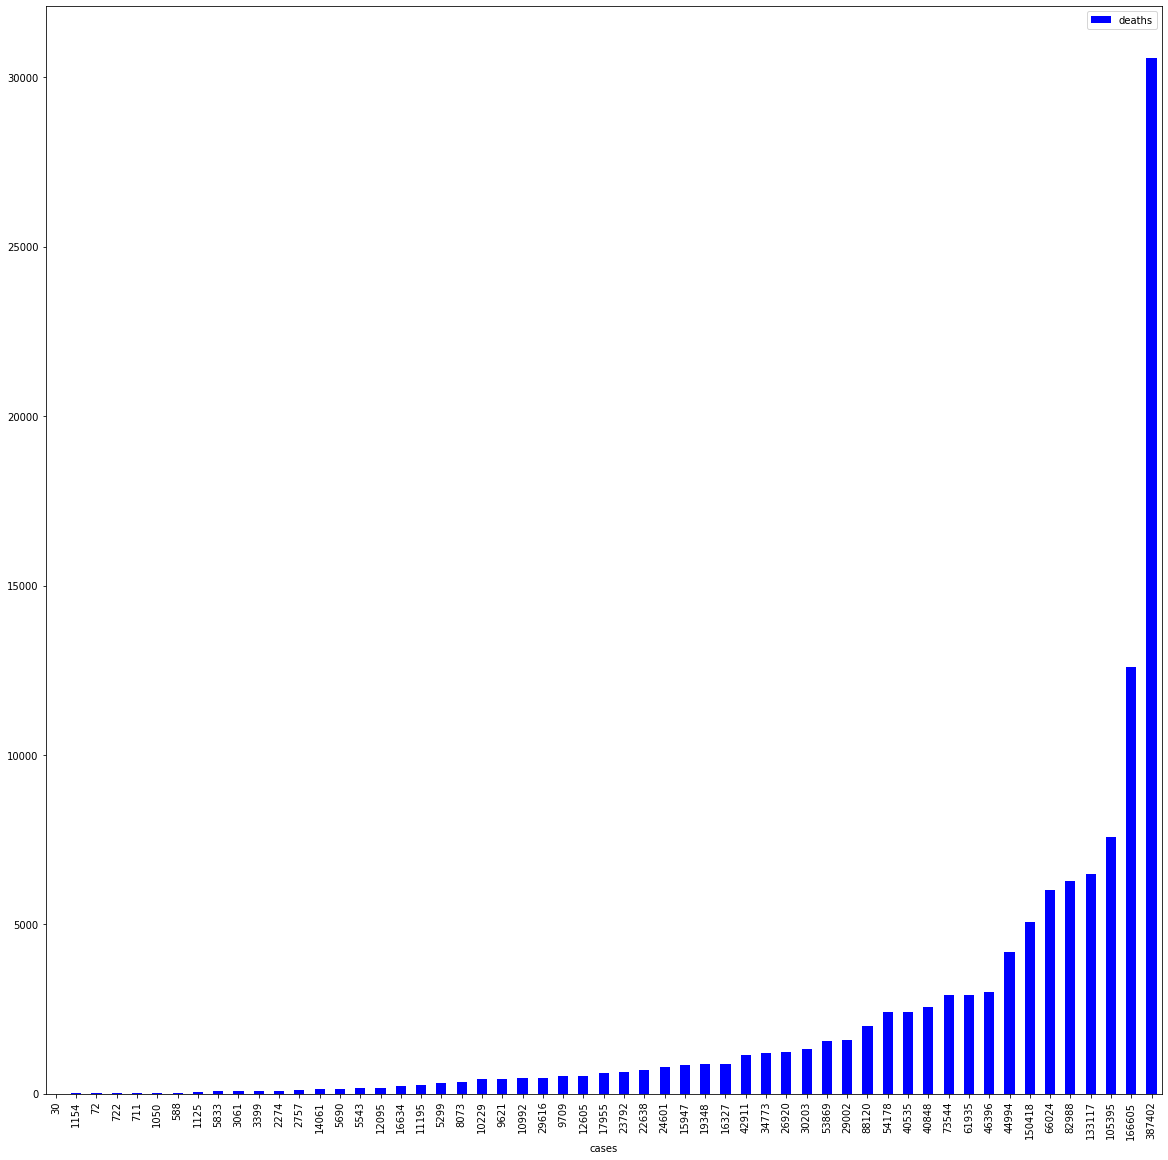

In [43]:
groupbystatelatest.sort_values('deaths', ascending = True, inplace=True)
plt.rcParams["figure.figsize"]=20,20 
groupbystatelatest.plot(kind = 'bar', x = 'cases', y = 'deaths', color = 'blue')
ax1 = plt.gca()

C:\Users\chuth\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


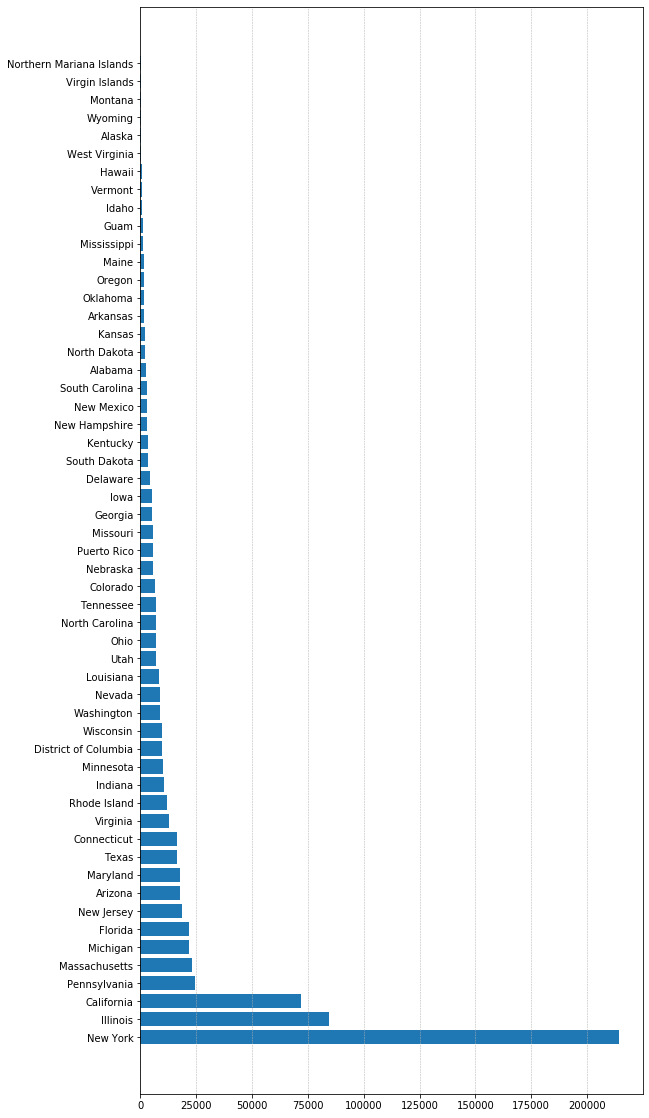

In [32]:
figtest = plt.figure(figsize= (9,20))
covid = plt.subplot(111)
latestuscovid.sort_values('cases', ascending = False, inplace=True)
covid.barh(latestuscovid['state'],latestuscovid['cases'])
covid.xaxis.grid(linestyle = '--', linewidth = 0.5)

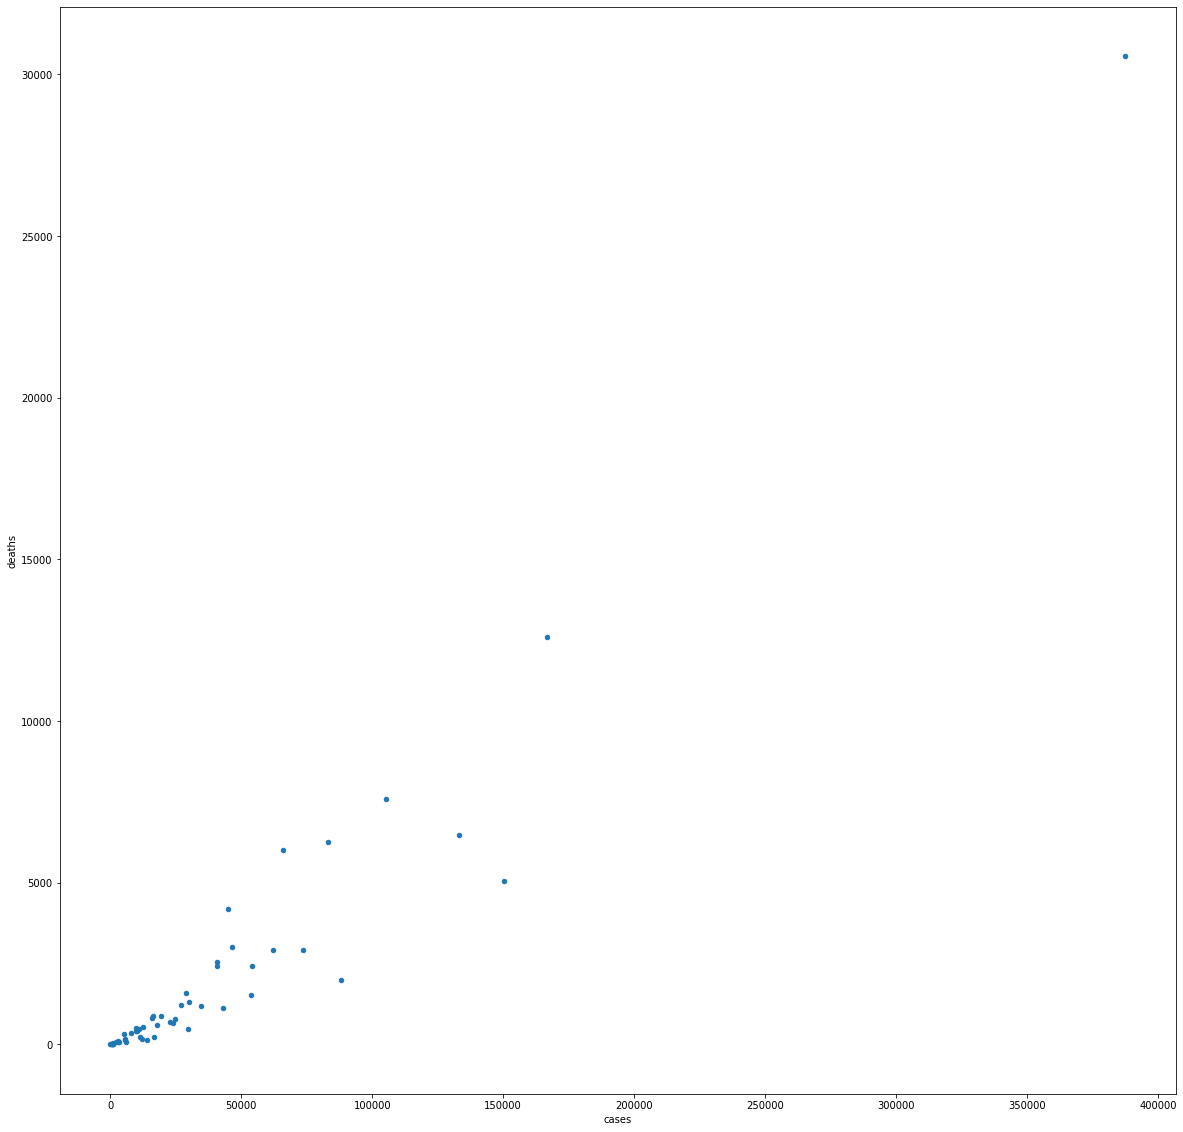

In [51]:
groupbystatelatest.plot.scatter(x='cases', y='deaths')